In [163]:
import numpy as np
import matplotlib.pyplot as plt


In [164]:

# Constants
N_particles = 56
box_size = 30  # Size of the simulation box (square)
temperature = .2  # Reduced temperature for energy calculations
energies = []
particle_radius = 1.0
old_positions = None

np.random.seed(42)  # For reproducibility


def calculate_lennard_jones_potential(positions, epsilon=2.0, sigma=particle_radius*2):
    """
    Calculate the total Lennard-Jones potential for a set of 2D particle positions.

    Parameters:
    - positions: np.ndarray of shape (N_particles, 2)
      The positions of the particles, where each row corresponds to a particle [x, y].
    - epsilon: float
      The depth of the potential well.
    - sigma: float
      The finite distance at which the inter-particle potential is zero.

    Returns:
    - total_energy: float
      The total Lennard-Jones potential energy.
    """
    N_particles = positions.shape[0]
    total_energy = 0.0

    for i in range(N_particles):
        for j in range(i + 1, N_particles):
            rij = np.linalg.norm(positions[i] - positions[j])
            if rij < 2 * sigma:  # Interacting radius for Lennard-Jones potential
                total_energy += 4 * epsilon * ((sigma / rij)**12 - (sigma / rij)**6)

    return total_energy

def inverse_square_porential(positions):
    N_particles = positions.shape[0]
    total_energy = 0.0

    for i in range(N_particles):
        for j in range(i + 1, N_particles):
            rij = np.linalg.norm(positions[i] - positions[j])
            total_energy += 1/(rij ** 2)

    return total_energy

def rigid_sphere_potential(positions):
    N_particles = positions.shape[0]
    total_energy = 0.0

    for i in range(N_particles):
        for j in range(i + 1, N_particles):
            rij = np.linalg.norm(positions[i] - positions[j])
            total_energy += 1/(rij ** 2)

    return total_energy


potential_function = inverse_square_porential

def monte_carlo_step(positions):
    i = np.random.randint(N_particles)
    new_pos = positions[i] + np.random.randn(2)  # Move particle by Gaussian step
    new_pos %= box_size  # Apply periodic boundary conditions

    old_energy = potential_function(positions)


     # Check for overlaps with other particles
    for j in range(N_particles):
        if i != j:
            if np.linalg.norm(new_pos - positions[j]) < 2 * particle_radius:  # Check for overlap
                return old_energy  # Reject new position due to overlap


    # Calculate energy change
    old_pos = positions[i].copy()
    positions[i] = new_pos
    new_energy = potential_function(positions)
    delta_E = new_energy - old_energy

    # Metropolis acceptance criterion
    if delta_E < 0 or np.random.rand() < np.exp(-delta_E / temperature):
        return new_energy
    else:
        positions[i] = old_pos
        return old_energy


In [165]:
# Global variables
# N_particles = 53
# box_size = 10.0  # Size of the simulation box (square)
# particle_radius = 0.5  # Radius of the particles

def is_overlap(p1, p2, radius):
    """ Check if two particles overlap given their positions and radius. """
    return np.linalg.norm(p1 - p2) < 2 * radius

def generate_non_overlapping_positions(N_particles, box_size, particle_radius):
    positions = np.zeros((N_particles, 2))  # Initialize positions
    for i in range(N_particles):
        valid_position = False
        while not valid_position:
            pos = np.random.rand(2) * box_size  # Random initial position
            valid_position = True
            # Check against all previously placed particles
            for j in range(i):
                if is_overlap(pos, positions[j], particle_radius):
                    valid_position = False
                    break
        positions[i] = pos
    return positions

# Generate non-overlapping initial positions
positions = generate_non_overlapping_positions(N_particles, box_size, particle_radius)
print("Initial non-overlapping positions:", positions)



Initial non-overlapping positions: [[11.23620357 28.52142919]
 [21.95981825 17.95975453]
 [ 4.68055921  4.67983561]
 [ 1.74250837 25.98528437]
 [18.03345035 21.24217733]
 [ 0.61753483 29.09729556]
 [24.97327922  6.37017332]
 [ 9.12726729 15.74269295]
 [12.95835056  8.73687421]
 [18.35558684  4.18481582]
 [ 8.76433946 10.9908553 ]
 [13.68209953 23.55527884]
 [ 5.99021346 15.42703315]
 [17.77243707  1.39351238]
 [28.96896099 24.25192044]
 [ 9.13841308  2.93016342]
 [20.5269908  13.20457481]
 [ 3.66114705 14.8553073 ]
 [ 7.76339945 19.87566853]
 [16.40130838  5.54563367]
 [28.18496825 26.84482051]
 [17.93699936 27.65622705]
 [ 2.65477506  5.87948587]
 [ 1.35681867  9.75990992]
 [24.86212527 10.7025998 ]
 [ 4.22772675 24.06590942]
 [ 0.16566351 24.46384285]
 [21.20572032 21.87021504]
 [23.1381104   2.22133955]
 [25.89310278 18.6989438 ]
 [26.61638228 14.16644775]
 [ 3.58782738 21.39734362]
 [23.1290154  14.81386789]
 [15.68198488 12.82623055]
 [ 0.7625738   3.23674281]
 [ 0.94287557 19.092

In [166]:
num_iterations = 1000  # Number of Monte Carlo steps

# Run the simulation

old_positions = positions.copy()
old_iteration_num = len(energies)

for step in range(num_iterations):   
    energy = monte_carlo_step(positions)
    energies.append(energy)

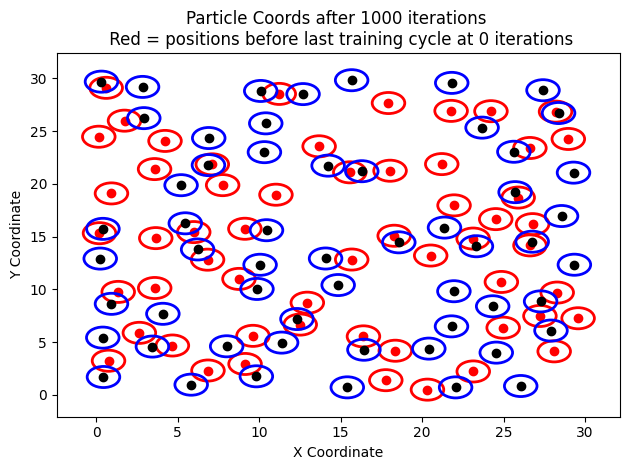

In [167]:

if old_positions is not None:
  old_x_coords, old_y_coords = old_positions[:, 0], old_positions[:, 1]
  plt.scatter(old_x_coords, old_y_coords, c="red")
  for i in range(N_particles):
      old_circle = plt.Circle((old_positions[i][0], old_positions[i][1]), particle_radius, fill=False, edgecolor='red', linewidth=2)
      plt.gca().add_patch(old_circle)  # Add circle to the plot


x_coords, y_coords = positions[:, 0], positions[:, 1]
plt.scatter(x_coords, y_coords, c="black")
for i in range(N_particles):
    circle = plt.Circle((positions[i][0], positions[i][1]), particle_radius, fill=False, edgecolor='blue', linewidth=2)
    plt.gca().add_patch(circle)  # Add circle to the plot




plt.title(f"Particle Coords after {len(energies)} iterations \n Red = positions before last training cycle at {old_iteration_num} iterations")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
# plt.legend(['Old particle positions', 'New Particle Positions'])
plt.tight_layout()
plt.show()

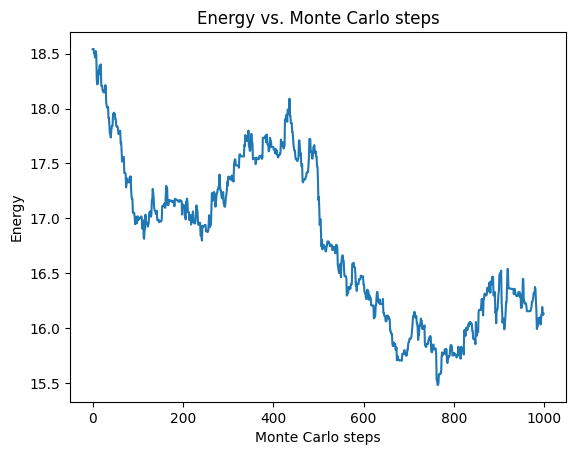

In [168]:

# Calculate pressure (in reduced units)
pressure = N_particles / (box_size ** 2)  # Ideal gas law approximation for 2D system

# Plot energy over iterations
plt.plot(energies)
plt.xlabel('Monte Carlo steps')
plt.ylabel('Energy')
plt.title('Energy vs. Monte Carlo steps')
plt.show()

# print(f"Estimated pressure: {pressure}")

In [169]:
print(energies)

[18.541474384714085, 18.541474384714085, 18.54356255247943, 18.507182585521218, 18.507182585521218, 18.466319296385485, 18.48131514498825, 18.523557410471255, 18.49059755017162, 18.26339897450916, 18.220171772670156, 18.223339794774077, 18.25785526233093, 18.346158325376848, 18.312542034545736, 18.390268005614406, 18.390268005614406, 18.384266909693576, 18.40287577727355, 18.20665219834574, 18.20665219834574, 18.20665219834574, 18.164797746363885, 18.164797746363885, 18.1484728883719, 18.14887922070685, 18.147185783163565, 18.147185783163565, 18.214370601901937, 18.18429296947133, 18.05448572711124, 18.026277482509183, 18.007286212362892, 18.007286212362892, 18.015638014147942, 17.914139937948185, 17.914139937948185, 17.83503235432707, 17.773627299253008, 17.79137997198459, 17.736272855235917, 17.78902554036943, 17.82511540630165, 17.843420275847677, 17.843420275847677, 17.949535070408253, 17.949535070408253, 17.962606325719122, 17.941537259180663, 17.952511035362733, 17.90450610869114